[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alikn/intro_to_ai/blob/master/logistic_regression.ipynb)

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

 The columns are different measurements of material in a glass sample that can be used to identify the glass type. For detailed information on the columns in this data set: http://archive.ics.uci.edu/ml/datasets/glass+identification

Data Dictionary

- Id: number: 1 to 214
- RI: refractive index
- Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- Mg: Magnesium
- Al: Aluminum
- Si: Silicon
- K : Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron
- Type : Type of glass: types 1, 2, and 3 are Window glass and types 5, 6, and 7 are household glass

In [4]:
df = pd.read_csv('https://alik-courses.web.app/intro-to-ai/datasets/glass.csv')

### Split the data to train and validation sets

In [18]:
df_train_source, df_val_source = train_test_split(df, train_size=0.3, random_state=1234)

In [19]:
df_train = df_train_source.copy()
df_val = df_val_source.copy()

### Exploratory data analysis

In [20]:
df_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.00,0.0,2
187,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.00,0.0,7
85,1.51625,13.36,3.58,1.49,72.72,0.45,8.21,0.00,0.0,2
18,1.51911,13.90,3.73,1.18,72.12,0.06,8.89,0.00,0.0,1
213,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.0,7


In [21]:
df_train.shape

(64, 10)

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 109 to 47
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      64 non-null     float64
 1   Na      64 non-null     float64
 2   Mg      64 non-null     float64
 3   Al      64 non-null     float64
 4   Si      64 non-null     float64
 5   K       64 non-null     float64
 6   Ca      64 non-null     float64
 7   Ba      64 non-null     float64
 8   Fe      64 non-null     float64
 9   Type    64 non-null     int64  
dtypes: float64(9), int64(1)
memory usage: 5.5 KB


In [23]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,64.0,1.518481,0.003274,1.51316,1.51645,1.51772,1.519012,1.53393
Na,64.0,13.373750,0.665338,11.03000,12.99250,13.32000,13.720000,14.95000
Mg,64.0,2.830781,1.359613,0.00000,2.73250,3.50500,3.612500,3.90000
Al,64.0,1.468594,0.499002,0.47000,1.25250,1.42000,1.647500,3.04000
Si,64.0,72.621250,0.696933,70.16000,72.31750,72.69000,73.102500,74.45000
K,64.0,0.527969,0.780122,0.00000,0.12000,0.55000,0.612500,6.21000
Ca,64.0,8.868125,1.499791,5.79000,8.16250,8.63000,9.010000,16.19000
Ba,64.0,0.142656,0.413779,0.00000,0.00000,0.00000,0.000000,1.67000
Fe,64.0,0.042188,0.075034,0.00000,0.00000,0.00000,0.090000,0.29000
Type,64.0,2.671875,2.047489,1.00000,1.00000,2.00000,3.000000,7.00000


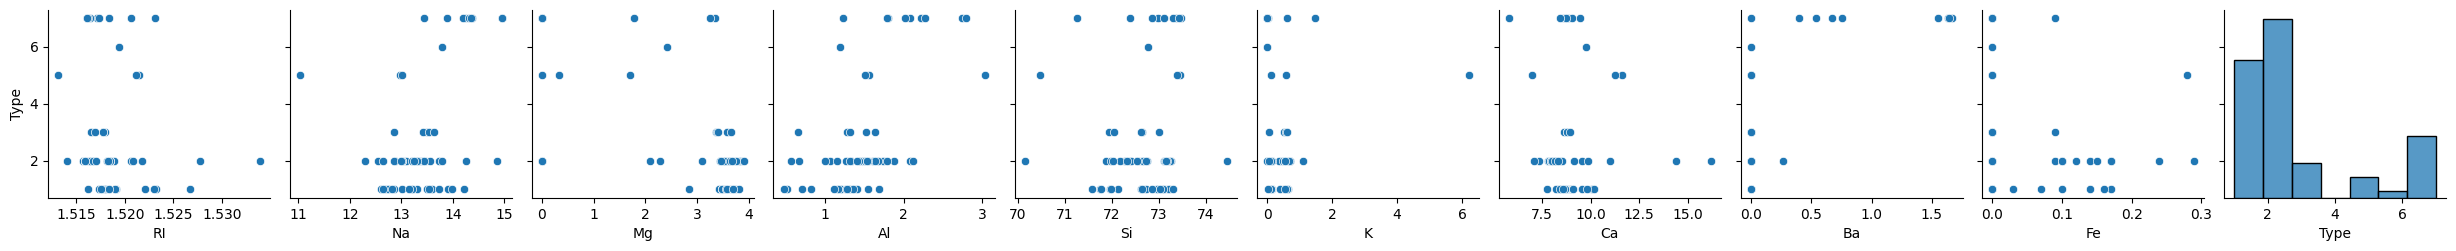

In [24]:
sns.pairplot(df_train, y_vars=['Type'])

### Preprocessing

To create a column which shows if a glass is of household type or window type, we map the "Type" column to a new column.
- Window glass: 0
- Household glass: 1

In [25]:
df_train['glass_category'] = df_train.Type.map({1: 0, 2: 0, 3: 0, 5: 1, 6: 1, 7: 1})

In [26]:
df_val['glass_category'] = df_val.Type.map({1: 0, 2: 0, 3: 0, 5: 1, 6: 1, 7: 1})

In [27]:
df_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,glass_category
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.00,0.0,2,0
187,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.00,0.0,7,1
85,1.51625,13.36,3.58,1.49,72.72,0.45,8.21,0.00,0.0,2,0
18,1.51911,13.90,3.73,1.18,72.12,0.06,8.89,0.00,0.0,1,0
213,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.0,7,1


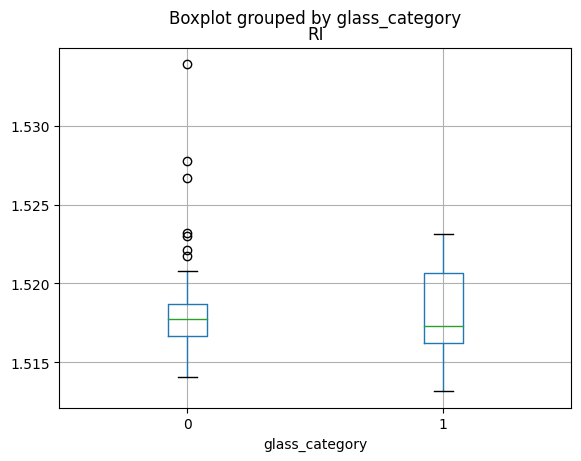

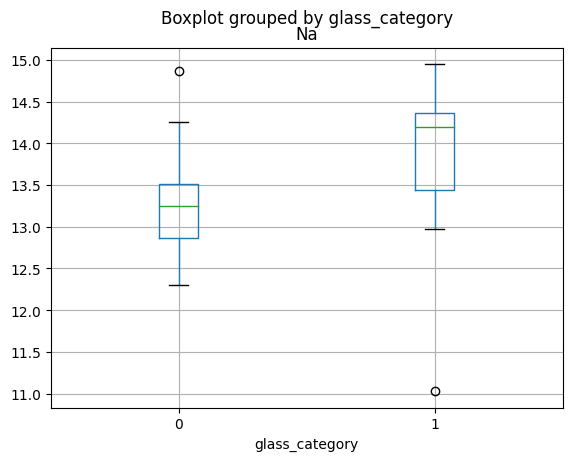

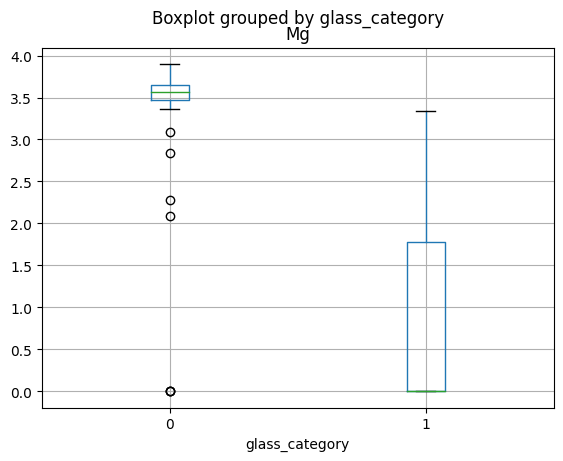

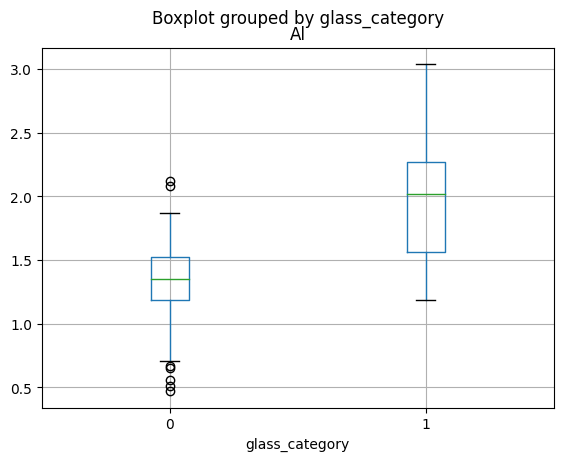

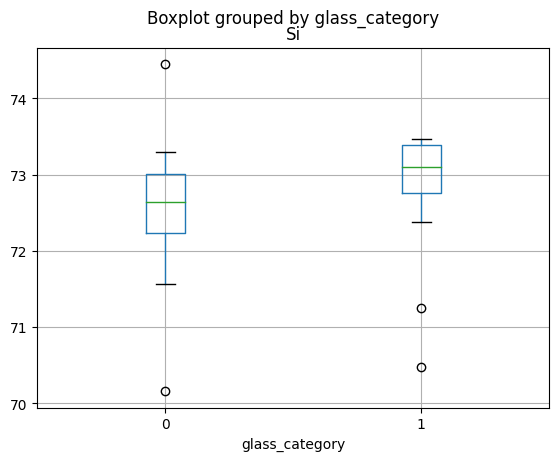

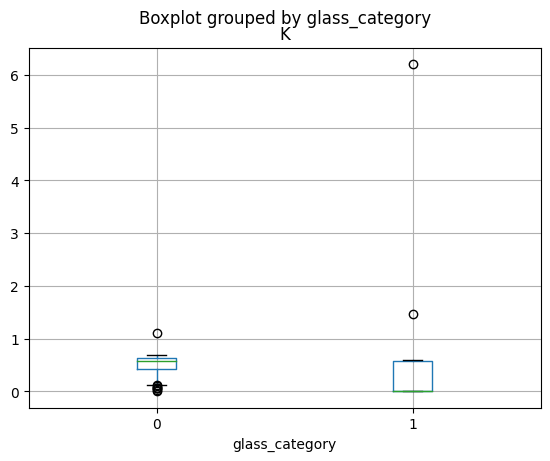

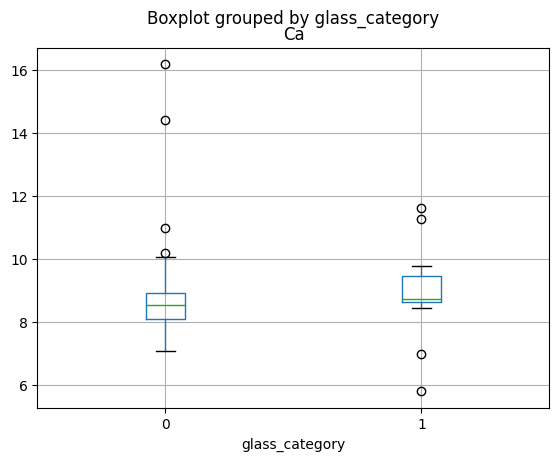

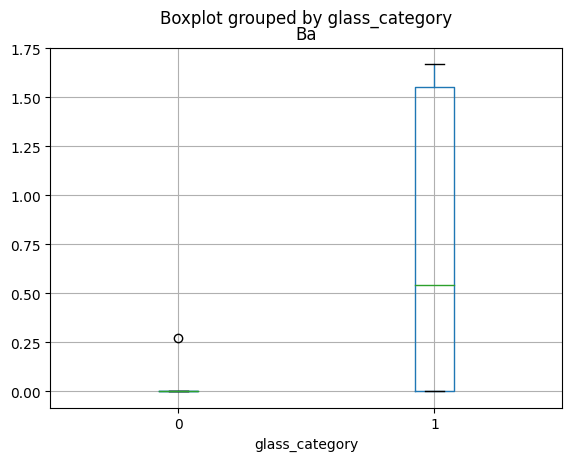

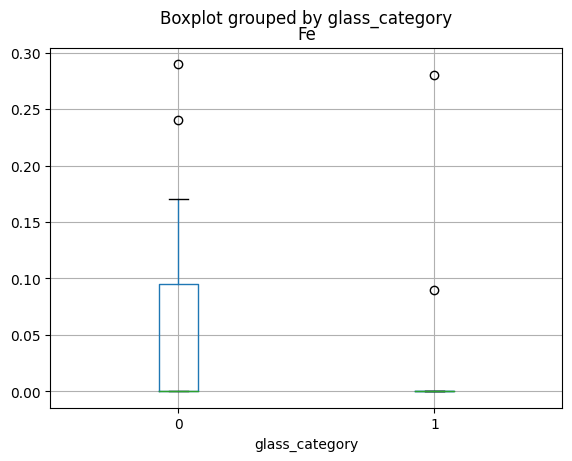

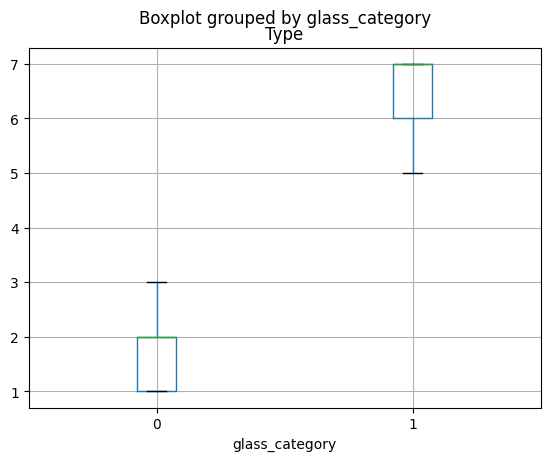

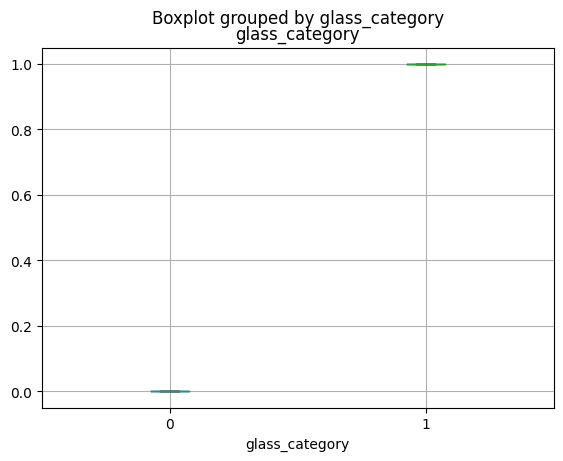

In [34]:
for col in df_train.columns:
    df_train.boxplot(column=col, by='glass_category')

### Training a logistic regression model

In [35]:
X = df_train[['Mg']]
y = df_train['glass_category']

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [36]:
log_reg.coef_

array([[-1.11123821]])

In [37]:
log_reg.intercept_

array([1.2681258])

In [38]:
log_reg.predict_proba([[0], [3.2]])

C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.21957825, 0.78042175],
       [0.90786464, 0.09213536]])

In [39]:
log_reg.predict([[0], [3.2]])

C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 0], dtype=int64)

In [40]:
# Use val set for prediction
y_hat = log_reg.predict(df_val[['Mg']])

In [41]:
accuracy_score(df_val['glass_category'], y_hat)

0.88

In [42]:
precision_score(df_val['glass_category'], y_hat)

0.7941176470588235

In [43]:
recall_score(df_val['glass_category'], y_hat)

0.7105263157894737

In [44]:
f1_score(df_val['glass_category'], y_hat)

0.7499999999999999

### Creating a training function

In [46]:
def train_log_reg(cols, C=1, max_iter=100, penalty='l2'):
  log_reg_model = LogisticRegression(C=C, max_iter=max_iter, penalty=penalty, solver='saga')
  log_reg_model.fit(df_train[cols], df_train['glass_category'])
  
  y_hat = log_reg_model.predict(df_val[cols])

  print(f"intercept: {log_reg_model.intercept_}")
  print(f"coefficients: {log_reg_model.coef_}")
  print(f"Accuracy score: {accuracy_score(df_val['glass_category'], y_hat)}")
  print(f"Precision score: {precision_score(df_val['glass_category'], y_hat)}")
  print(f"Recall score: {recall_score(df_val['glass_category'], y_hat)}")
  print(f"f1 score: {f1_score(df_val['glass_category'], y_hat)}")

In [47]:
train_log_reg(['Mg'])

intercept: [1.26674788]
coefficients: [[-1.11079899]]
Accuracy score: 0.88
Precision score: 0.7941176470588235
Recall score: 0.7105263157894737
f1 score: 0.7499999999999999


In [48]:
train_log_reg(['Mg', 'Al'])

intercept: [-1.25950519]
coefficients: [[-1.04807349  1.56185191]]
Accuracy score: 0.9
Precision score: 0.8709677419354839
Recall score: 0.7105263157894737
f1 score: 0.782608695652174


C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [49]:
train_log_reg(df_train.columns)

intercept: [-0.00124475]
coefficients: [[-0.00187603  0.03618201 -0.33122457  0.09944127 -0.05276979  0.04820401
  -0.00386751  0.09083041 -0.0022736   0.74080537  0.16844182]]
Accuracy score: 0.9933333333333333
Precision score: 1.0
Recall score: 0.9736842105263158
f1 score: 0.9866666666666666


C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [50]:
train_log_reg(df_train.columns, max_iter=200)

intercept: [-0.00172426]
coefficients: [[-2.52281280e-03  1.67234300e-02 -4.18423269e-01  1.25127018e-01
  -6.05103253e-02  7.22887642e-02 -8.11680650e-04  1.11859349e-01
  -2.63395230e-03  9.77556401e-01  2.31710480e-01]]
Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
f1 score: 1.0


C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [51]:
train_log_reg(df_train.columns, max_iter=200, C=0.1)

intercept: [-0.00201961]
coefficients: [[-0.00202984  0.01522469 -0.33272413  0.1005162  -0.05131073  0.05807203
  -0.00174231  0.08850519 -0.00226925  0.7793085   0.18382251]]
Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
f1 score: 1.0


C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [52]:
train_log_reg(df_train.columns, penalty='l1')

intercept: [-0.00161108]
coefficients: [[ 0.00000000e+00  3.28496867e-04 -3.15149283e-01  7.06248232e-02
  -4.57417944e-02  2.07016290e-02  0.00000000e+00  6.35874414e-02
   0.00000000e+00  7.36467348e-01  1.41618847e-01]]
Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
f1 score: 1.0


C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
